# Initial calibration

### Setup

In [1]:
import logging, logging.config

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sns
import numpy as np
import pandas as pd
import pickle
from scipy.stats import hmean
import yaml

from simulation_utils.preference import generate_uniform
from simulation_utils.observation import sample_popular_n, sample_uniform_n
from simulation_utils.utils import truncated_beta_binomial, truncated_pareto
from simulation_utils.datasets import ml_100k

import simulation_utils as sims_utils
%matplotlib inline

### Read data

In [2]:
data = ml_100k()
nusers = len(data['user'].unique())
nitems = len(data['item'].unique())

In [3]:
print(nusers, nitems)

943 1682


In [4]:
data.head()

,user,item,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


### Check point

In [5]:
import os
import re

In [12]:
pattern = re.compile('calibrations_unif_unif.*.pkl')
filenames = [fn for fn in os.listdir('build') if pattern.match(fn)]

In [13]:
filenames

['calibrations_unif_unif_2019-02-15-00-37-11.pkl']

In [14]:
results = []
for fn in filenames:
    path = os.path.join('build', fn)
    with open(path, 'rb') as f:
        result = pickle.load(f)
    results.extend(result)

In [15]:
res_df = pd.DataFrame(results)

In [16]:
res_df.head()

,item_popularity_kl_divergence,obs,obs_a,obs_alpha,obs_b,obs_dist_func,obs_m,obs_n,obs_use_cap,pref,pref_frac,pref_nitems,pref_nusers,user_activity_kl_divergence
0,1.377464,sample_uniform_n,NaN,0.510528,NaN,truncated_pareto,20.0,NaN,True,generate_uniform,0.010651,1682,943,1.144195
1,1.390898,sample_uniform_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_uniform,0.010651,1682,943,1.131072
2,1.669709,sample_uniform_n,NaN,0.510528,NaN,truncated_pareto,20.0,NaN,True,generate_uniform,0.019867,1682,943,0.654118
3,1.676191,sample_uniform_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_uniform,0.019867,1682,943,0.663037
4,1.864759,sample_uniform_n,NaN,0.510528,NaN,truncated_pareto,20.0,NaN,True,generate_uniform,0.053607,1682,943,0.328576


In [17]:
res_df.shape

(40, 14)

In [30]:
res_df['hmean'] = hmean(res_df[['user_activity_kl_divergence', 'item_popularity_kl_divergence']], axis=1)

In [31]:
res_df[res_df['item_popularity_kl_divergence'] < 2].sort_values(['item_popularity_kl_divergence', 'user_activity_kl_divergence']).head(10)

,item_popularity_kl_divergence,obs,obs_a,obs_alpha,obs_b,obs_dist_func,obs_m,obs_n,obs_use_cap,pref,pref_frac,pref_nitems,pref_nusers,user_activity_kl_divergence,hmean
0,1.377464,sample_uniform_n,NaN,0.510528,NaN,truncated_pareto,20.0,NaN,True,generate_uniform,0.010651,1682,943,1.144195,1.250040
1,1.390898,sample_uniform_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_uniform,0.010651,1682,943,1.131072,1.247601
2,1.669709,sample_uniform_n,NaN,0.510528,NaN,truncated_pareto,20.0,NaN,True,generate_uniform,0.019867,1682,943,0.654118,0.939989
3,1.676191,sample_uniform_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_uniform,0.019867,1682,943,0.663037,0.950208
4,1.864759,sample_uniform_n,NaN,0.510528,NaN,truncated_pareto,20.0,NaN,True,generate_uniform,0.053607,1682,943,0.328576,0.558707
7,1.883502,sample_uniform_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_uniform,0.056099,1682,943,0.349243,0.589230
5,1.896639,sample_uniform_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_uniform,0.053607,1682,943,0.355973,0.599440
6,1.925563,sample_uniform_n,NaN,0.510528,NaN,truncated_pareto,20.0,NaN,True,generate_uniform,0.056099,1682,943,0.346669,0.587558
8,1.981158,sample_uniform_n,NaN,0.510528,NaN,truncated_pareto,20.0,NaN,True,generate_uniform,0.126886,1682,943,0.181787,0.333017
9,1.998578,sample_uniform_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_uniform,0.126886,1682,943,0.201410,0.365941


In [32]:
res_df[res_df['item_popularity_kl_divergence'] < 2].sort_values(['user_activity_kl_divergence', 'item_popularity_kl_divergence']).head(10)

,item_popularity_kl_divergence,obs,obs_a,obs_alpha,obs_b,obs_dist_func,obs_m,obs_n,obs_use_cap,pref,pref_frac,pref_nitems,pref_nusers,user_activity_kl_divergence,hmean
8,1.981158,sample_uniform_n,NaN,0.510528,NaN,truncated_pareto,20.0,NaN,True,generate_uniform,0.126886,1682,943,0.181787,0.333017
9,1.998578,sample_uniform_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_uniform,0.126886,1682,943,0.201410,0.365941
4,1.864759,sample_uniform_n,NaN,0.510528,NaN,truncated_pareto,20.0,NaN,True,generate_uniform,0.053607,1682,943,0.328576,0.558707
6,1.925563,sample_uniform_n,NaN,0.510528,NaN,truncated_pareto,20.0,NaN,True,generate_uniform,0.056099,1682,943,0.346669,0.587558
7,1.883502,sample_uniform_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_uniform,0.056099,1682,943,0.349243,0.589230
5,1.896639,sample_uniform_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_uniform,0.053607,1682,943,0.355973,0.599440
2,1.669709,sample_uniform_n,NaN,0.510528,NaN,truncated_pareto,20.0,NaN,True,generate_uniform,0.019867,1682,943,0.654118,0.939989
3,1.676191,sample_uniform_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_uniform,0.019867,1682,943,0.663037,0.950208
1,1.390898,sample_uniform_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_uniform,0.010651,1682,943,1.131072,1.247601
0,1.377464,sample_uniform_n,NaN,0.510528,NaN,truncated_pareto,20.0,NaN,True,generate_uniform,0.010651,1682,943,1.144195,1.250040


In [35]:
res_df[res_df['item_popularity_kl_divergence'] < 2].sort_values(['hmean'], ascending=False).head(10)

,item_popularity_kl_divergence,obs,obs_a,obs_alpha,obs_b,obs_dist_func,obs_m,obs_n,obs_use_cap,pref,pref_frac,pref_nitems,pref_nusers,user_activity_kl_divergence,hmean
0,1.377464,sample_uniform_n,NaN,0.510528,NaN,truncated_pareto,20.0,NaN,True,generate_uniform,0.010651,1682,943,1.144195,1.250040
1,1.390898,sample_uniform_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_uniform,0.010651,1682,943,1.131072,1.247601
3,1.676191,sample_uniform_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_uniform,0.019867,1682,943,0.663037,0.950208
2,1.669709,sample_uniform_n,NaN,0.510528,NaN,truncated_pareto,20.0,NaN,True,generate_uniform,0.019867,1682,943,0.654118,0.939989
5,1.896639,sample_uniform_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_uniform,0.053607,1682,943,0.355973,0.599440
7,1.883502,sample_uniform_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_uniform,0.056099,1682,943,0.349243,0.589230
6,1.925563,sample_uniform_n,NaN,0.510528,NaN,truncated_pareto,20.0,NaN,True,generate_uniform,0.056099,1682,943,0.346669,0.587558
4,1.864759,sample_uniform_n,NaN,0.510528,NaN,truncated_pareto,20.0,NaN,True,generate_uniform,0.053607,1682,943,0.328576,0.558707
9,1.998578,sample_uniform_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_uniform,0.126886,1682,943,0.201410,0.365941
8,1.981158,sample_uniform_n,NaN,0.510528,NaN,truncated_pareto,20.0,NaN,True,generate_uniform,0.126886,1682,943,0.181787,0.333017


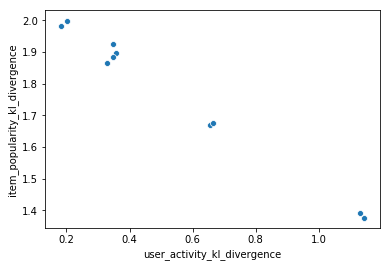

In [20]:
sns.scatterplot('user_activity_kl_divergence', 'item_popularity_kl_divergence', data=res_df[res_df['item_popularity_kl_divergence'] < 2])

### KL divergence vs. parameters

In [15]:
res_df_tall = res_df[['item_popularity_kl_divergence', 'obs_dist_func', 'pref_frac', 'pref_nitems', 'pref_nusers', 'user_activity_kl_divergence']].melt(
    id_vars = ['obs_dist_func', 'pref_frac', 'pref_nitems', 'pref_nusers'],
    value_vars=['item_popularity_kl_divergence', 'user_activity_kl_divergence'],
    var_name = 'statistics',
    value_name = 'score'
)

frac

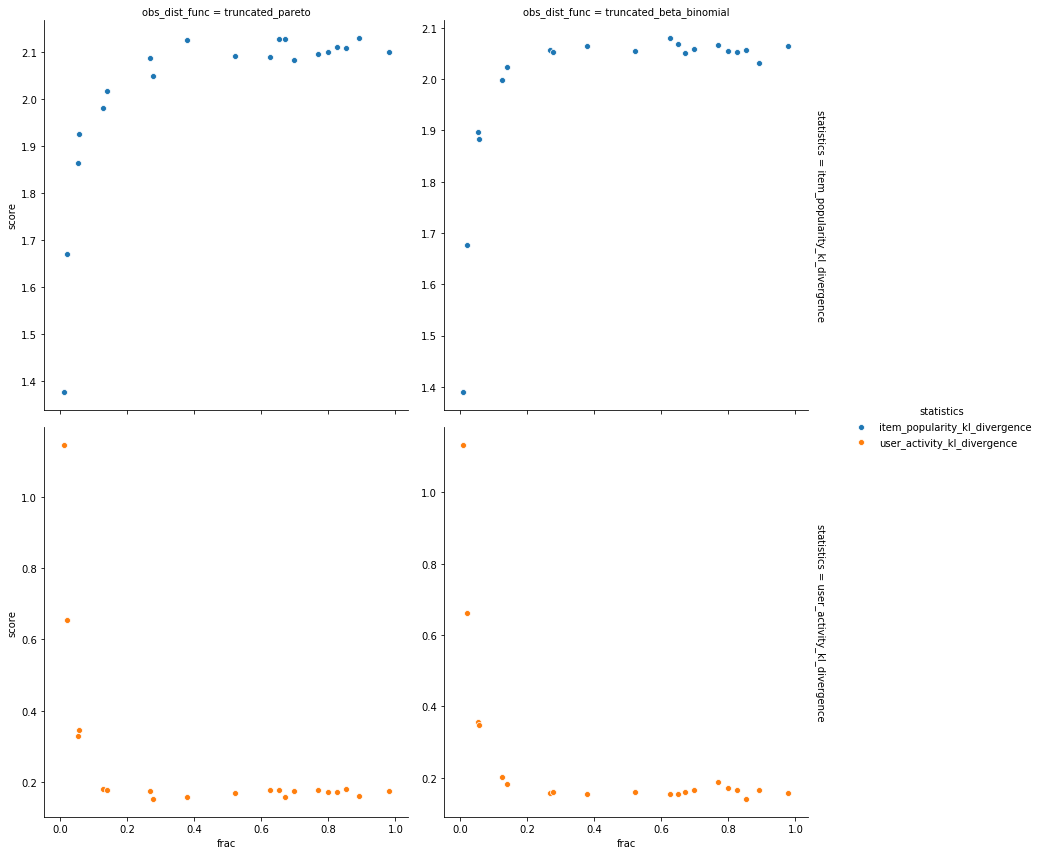

In [16]:
g = sns.FacetGrid(res_df_tall, col='obs_dist_func', hue='statistics', row='statistics', height=6, sharey=False, margin_titles=True)
g = (g.map(sns.scatterplot, 'pref_frac', 'score')
     .add_legend()
     .set_axis_labels('frac', 'score'))

In [17]:
def plot_scatter3d(x, y, z, c, **kwargs):
    ax = plt.gca()
    kwargs.pop('color')
    p = ax.scatter(x, y, z, c=c, **kwargs)
#     plt.colorbar(p, shrink=0.5, aspect=5)
    ax.set_zlabel('c')

In [18]:
cmap_name = None
cmap = plt.get_cmap(cmap_name)
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(res_df_tall['score'])

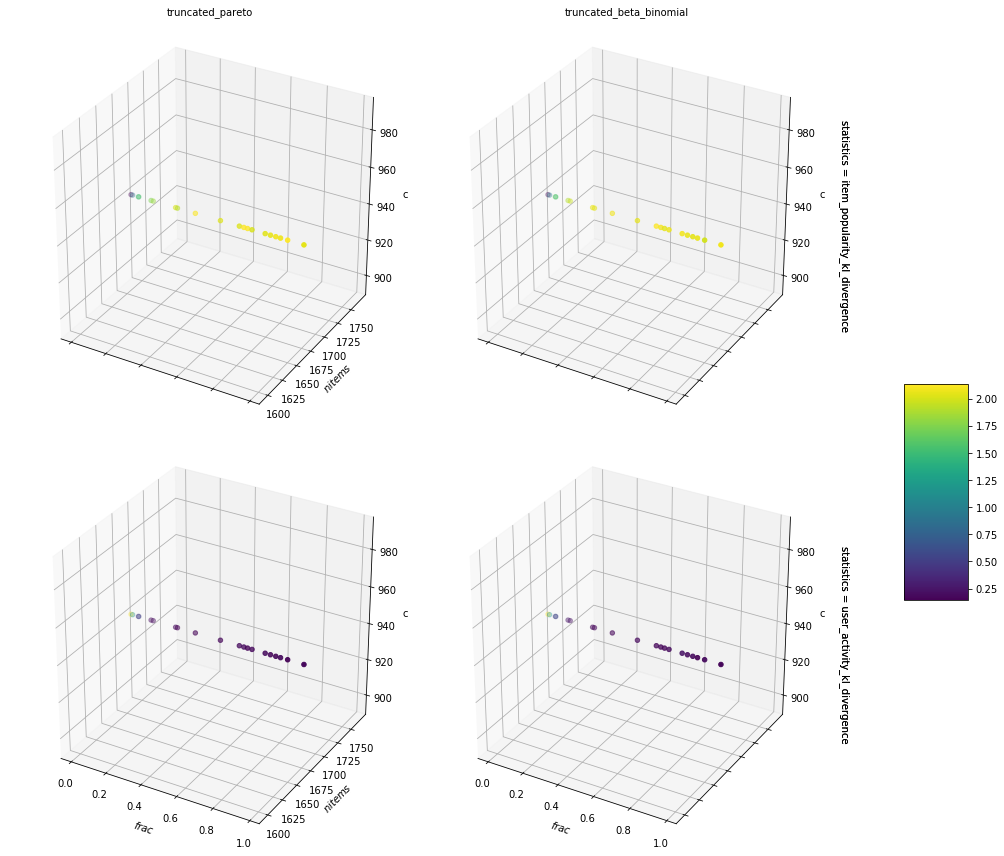

In [19]:
g = sns.FacetGrid(res_df_tall, col='obs_dist_func', row='statistics', height=6, margin_titles=True, subplot_kws=dict(projection='3d'))
g = (g.map(plot_scatter3d, 'pref_frac', 'pref_nitems', 'pref_nusers', 'score', cmap=cmap)
     .set_titles(col_template='{col_name}')
     .set_axis_labels(r'$frac$', r'$nitems$'))
cax = g.fig.add_axes([1.05, 0.3, 0.075, 0.25])
plt.colorbar(sm, cax=cax)

Generate simulated data using the best parameters

In [31]:
def simulated_data_bb(nusers=943, nitems=1682, frac=0.010651):
#     pref = generate_ibp_df(943, 1009.2, 0.3, 0.8)
    pref = generate_uniform(nusers, nitems, frac)
    obs = sample_uniform_n(pref, truncated_beta_binomial, True, a=1.6638872003071793e-05, b=2.8157887296158077, n=737)
    return obs

In [32]:
def simulated_data_pareto(nusers=943, nitems=1682, frac=0.010651):
#     pref = generate_ibp_df(943, 1009.2, 10, 0)
    pref = generate_uniform(nusers, nitems, frac)
    obs = sample_uniform_n(pref, truncated_pareto, True, m=20.00000045, alpha=0.510528)
    return obs

In [33]:
def simulated_data(name, *args, **kwargs):
    out = None
    if 'TBB' in name:
        out = simulated_data_bb(*args, **kwargs)
    if 'TP' in name:
        out = simulated_data_pareto(*args, **kwargs)
    return out

In [34]:
# def simulated_data_geo():
#     pref = generate_ibp_df(943, 1009, 1, 0)
#     obs = sample_popular_n(pref, np.random.geometric, False, p=0.05)
#     return obs

In [35]:
def compute_density(data):
    nusers = len(data['user'].unique())
    nitems = len(data['item'].unique())
    npairs = len(data)
    density = npairs / nitems / nusers
    return nusers, nitems, npairs, density

In [36]:
def compute_data_stats(data):
    pairs = data.loc[:, ['user', 'item']]
    user_activity = pairs.groupby('user', as_index=False).count().rename(columns={'item': 'count'})
    item_popularity = pairs.groupby('item', as_index=False).count().rename(columns={'user': 'count'})
    return user_activity, item_popularity

In [37]:
def summarize_dataset(name, data_func, *args, **kwargs):
    dataset = data_func(*args, **kwargs)
    colname = dataset.columns
    if not {'user', 'item'}.issubset(colname):
        dataset.rename(columns={colname[0]: 'user',
                                colname[1]: 'item'},
                       inplace=True)
    dataset = dataset[['user', 'item']]
    data_meta = compute_density(dataset)
    data_meta_stats = tuple([name, *data_meta])
    
    user_activity, item_popularity = compute_data_stats(dataset)
    user_activity['dataset'] = name
    user_activity.drop('user', axis=1, inplace=True)
    item_popularity['dataset'] = name
    item_popularity.drop('item', axis=1, inplace=True)
    item_popularity['rank'] = item_popularity['count'].rank(method='min', ascending=False)

    user_activity_stats = user_activity['count'].rename(name).describe()
    item_popularity_stats = item_popularity['count'].rename(name).describe()
    return data_meta_stats, user_activity_stats, item_popularity_stats, user_activity, item_popularity

In [38]:
res_df['distance'] = res_df['item_popularity_kl_divergence'] ** 2 + res_df['user_activity_kl_divergence'] ** 2

In [39]:
res_df.head()

,item_popularity_kl_divergence,obs,obs_a,obs_alpha,obs_b,obs_dist_func,obs_m,obs_n,obs_use_cap,pref,pref_frac,pref_nitems,pref_nusers,user_activity_kl_divergence,distance
0,1.377464,sample_uniform_n,NaN,0.510528,NaN,truncated_pareto,20.0,NaN,True,generate_uniform,0.010651,1682,943,1.144195,3.206589
1,1.390898,sample_uniform_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_uniform,0.010651,1682,943,1.131072,3.213923
2,1.669709,sample_uniform_n,NaN,0.510528,NaN,truncated_pareto,20.0,NaN,True,generate_uniform,0.019867,1682,943,0.654118,3.215797
3,1.676191,sample_uniform_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_uniform,0.019867,1682,943,0.663037,3.249235
4,1.864759,sample_uniform_n,NaN,0.510528,NaN,truncated_pareto,20.0,NaN,True,generate_uniform,0.053607,1682,943,0.328576,3.585288


In [40]:
res_params = res_df[['obs_dist_func', 'pref_nusers', 'pref_nitems', 'pref_frac', 'item_popularity_kl_divergence', 'user_activity_kl_divergence', 'distance']]

In [41]:
res_params.head()

,obs_dist_func,pref_nusers,pref_nitems,pref_frac,item_popularity_kl_divergence,user_activity_kl_divergence,distance
0,truncated_pareto,943,1682,0.010651,1.377464,1.144195,3.206589
1,truncated_beta_binomial,943,1682,0.010651,1.390898,1.131072,3.213923
2,truncated_pareto,943,1682,0.019867,1.669709,0.654118,3.215797
3,truncated_beta_binomial,943,1682,0.019867,1.676191,0.663037,3.249235
4,truncated_pareto,943,1682,0.053607,1.864759,0.328576,3.585288


In [42]:
NPARAMS = 10
ip_params = res_params.sort_values(['obs_dist_func', 'item_popularity_kl_divergence']).groupby('obs_dist_func').head(NPARAMS)
ua_params = res_params.sort_values(['obs_dist_func', 'user_activity_kl_divergence']).groupby('obs_dist_func').head(NPARAMS)
d_params = res_params.sort_values(['obs_dist_func', 'distance']).groupby('obs_dist_func').head(NPARAMS)

In [43]:
from itertools import repeat

In [44]:
def summarize_datasets(params):
    from multiprocessing import Pool
    params = params.join(params.groupby('obs_dist_func').cumcount().rename('param_no'))
    params['name'] = params['obs_dist_func'].map(lambda x: ''.join(next(zip(*x.split('_')))).upper()) + params['param_no'].map(str)
    params = zip(params['name'].values, repeat(simulated_data), 
                 *params[['name', 'pref_nusers', 'pref_nitems', 'pref_frac']].to_dict('list').values()) 
    with Pool(10) as p:
        results = p.starmap(summarize_dataset, params)
    simulated_results = zip(*results)
    ml_100k_results = summarize_dataset('ml_100k', ml_100k)
    df = pd.DataFrame.from_records([ml_100k_results[0], *next(simulated_results)],
                               columns=['dataset', 'nusers', 'nitems', 'npairs', 'density'])
    print('dataset stats')
    print(df)

    df = pd.concat([ml_100k_results[1], *next(simulated_results)], axis=1)
    print('user profile stats')
    print(df)

    df = pd.concat([ml_100k_results[2], *next(simulated_results)], axis=1)
    print('item popularity stats')
    print(df)

    user_profile_df = pd.concat(next(simulated_results), axis=0, ignore_index=True)

    item_popularity_df = pd.concat(next(simulated_results), axis=0, ignore_index=True)
    return ml_100k_results[3:], user_profile_df, item_popularity_df

#### Top10 parameters sorted by item popularity KL

In [45]:
ml_100k_results, user_profile_df, item_popularity_df = summarize_datasets(ip_params)

dataset stats
    dataset  nusers  nitems  npairs   density
0   ml_100k     943    1682  100000  0.063047
1      TBB0     943    1682   16994  0.010714
2      TBB1     943    1682   29912  0.018859
3      TBB2     943    1682   61075  0.038506
4      TBB3     943    1682   59717  0.037650
5      TBB4     943    1682   88293  0.055666
6      TBB5     943    1682   90845  0.057275
7      TBB6     943    1682  103942  0.065532
8      TBB7     943    1682  103942  0.065532
9      TBB8     943    1682  103378  0.065176
10     TBB9     943    1682  103942  0.065532
11      TP0     943    1681   16940  0.010686
12      TP1     943    1682   29291  0.018467
13      TP2     943    1682   54978  0.034662
14      TP3     943    1682   57412  0.036196
15      TP4     943    1682   85188  0.053708
16      TP5     943    1682   86730  0.054680
17      TP6     943    1682  100651  0.063457
18      TP7     943    1682  116137  0.073221
19      TP8     943    1682  109628  0.069117
20      TP9     943 

In [46]:
def plot_scatter_against_baseline(*args, **kwargs):
    data = pd.concat(args, axis=1)
    data['dataset'] = kwargs.get('label')
    base = kwargs.pop('baseline')
    data = data.append(base[data.columns], ignore_index=True)
    args = map(lambda x: x.name, args)
    kwargs['label'] = data['dataset'].unique()
    ax = sns.scatterplot(*args, data=data, **kwargs)
    return ax

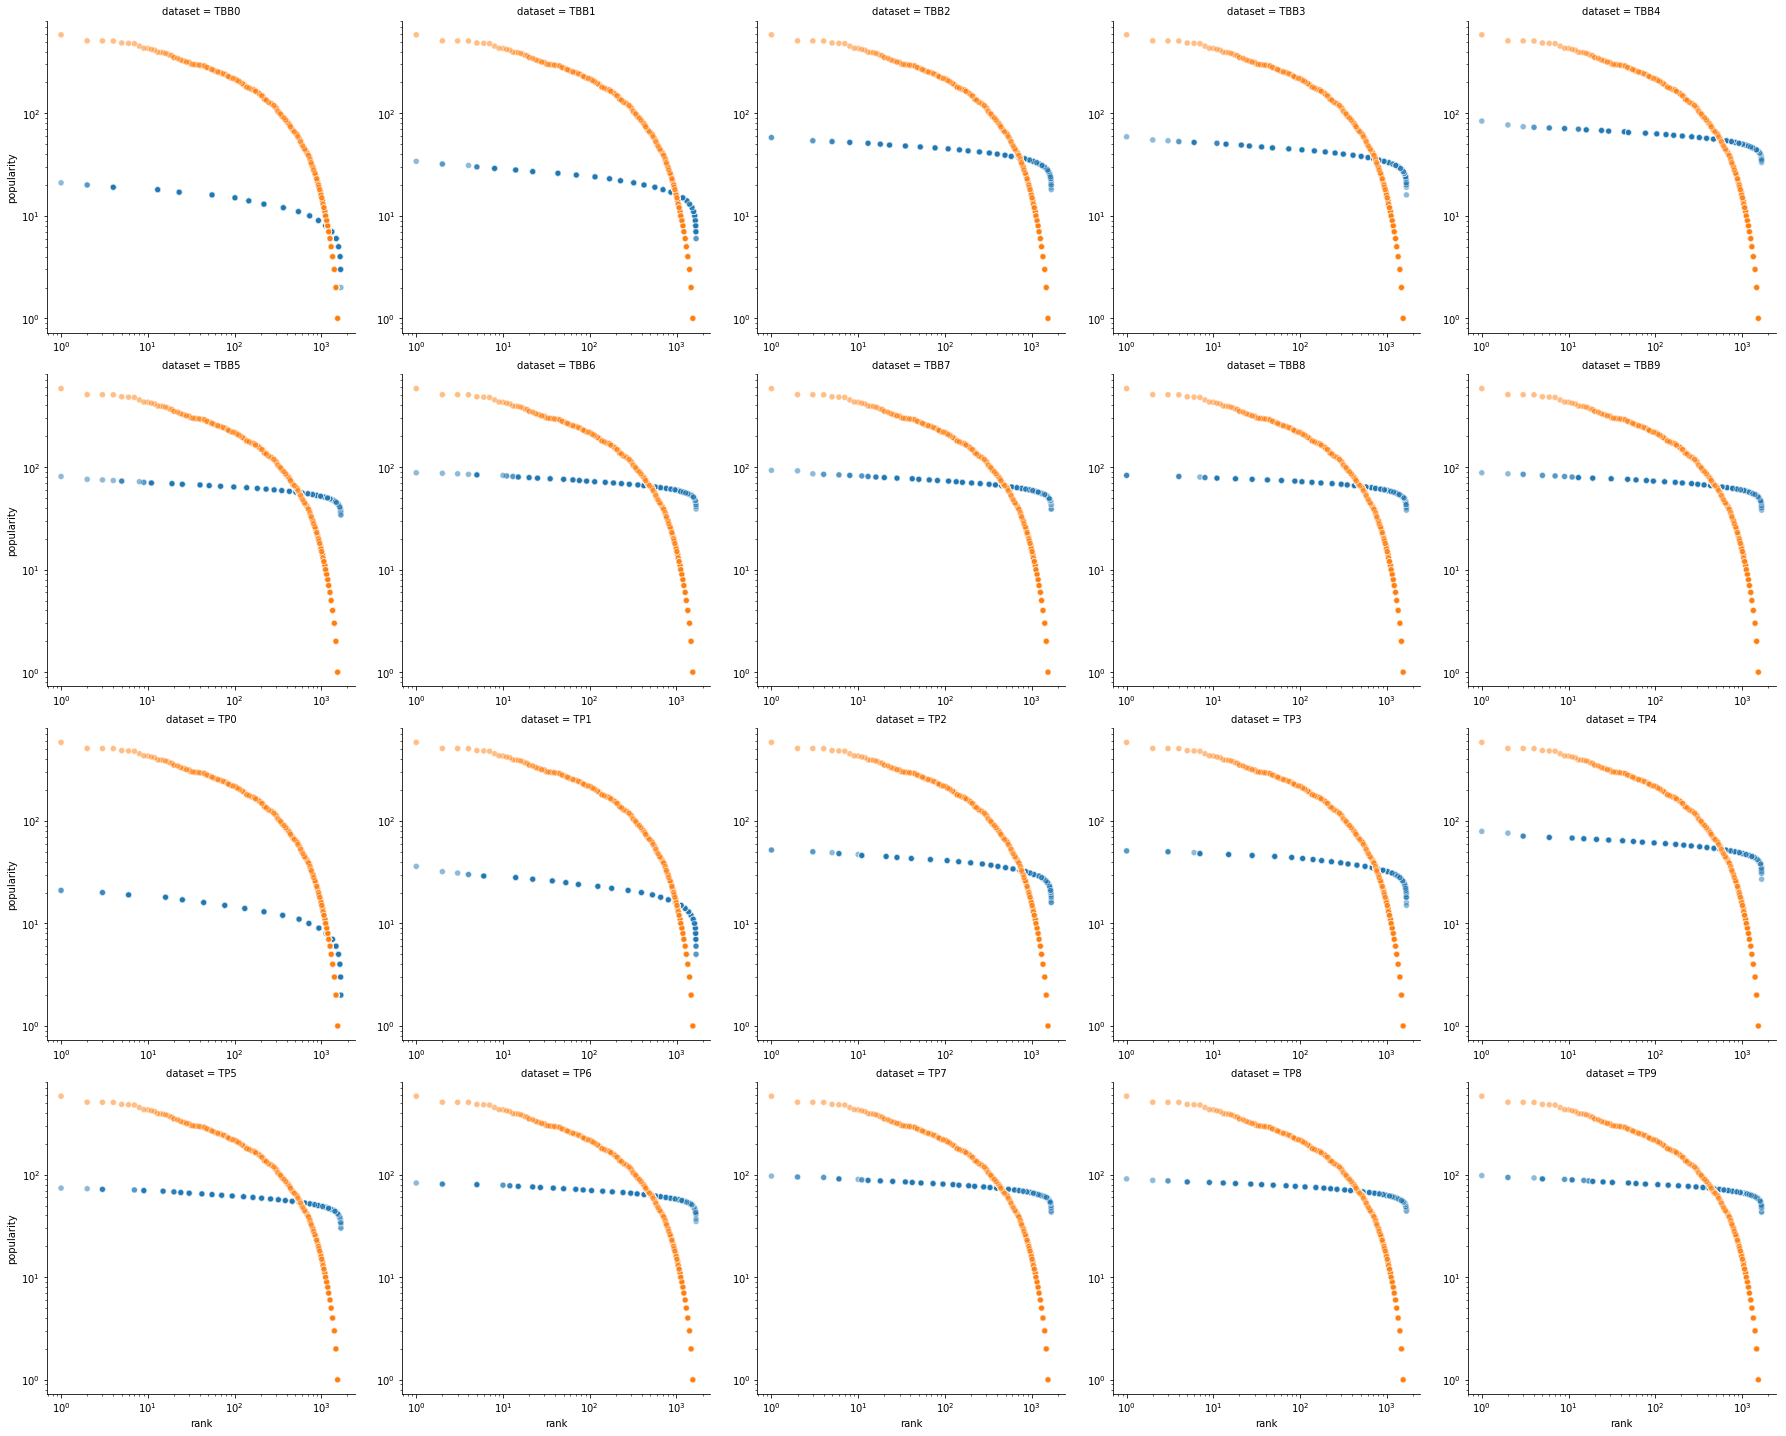

In [47]:
g = sns.FacetGrid(item_popularity_df, col='dataset', hue='dataset', sharex=False, sharey=False, col_wrap=5, height=5)
g = (g.map(plot_scatter_against_baseline, 'rank', 'count', hue='dataset', alpha=0.5, baseline=ml_100k_results[1])
     .set(xscale='log', yscale='log')
     .set_axis_labels('rank', 'popularity'))

In [48]:
popularity_counts = (item_popularity_df[['dataset', 'count']].groupby(['dataset', 'count'])
                     .size().reset_index().rename(columns={'count': 'popularity', 0: 'count'}))
ml_100k_pop_counts = (ml_100k_results[1][['dataset', 'count']].groupby(['dataset', 'count'])
                      .size().reset_index().rename(columns={'count': 'popularity', 0: 'count'}))

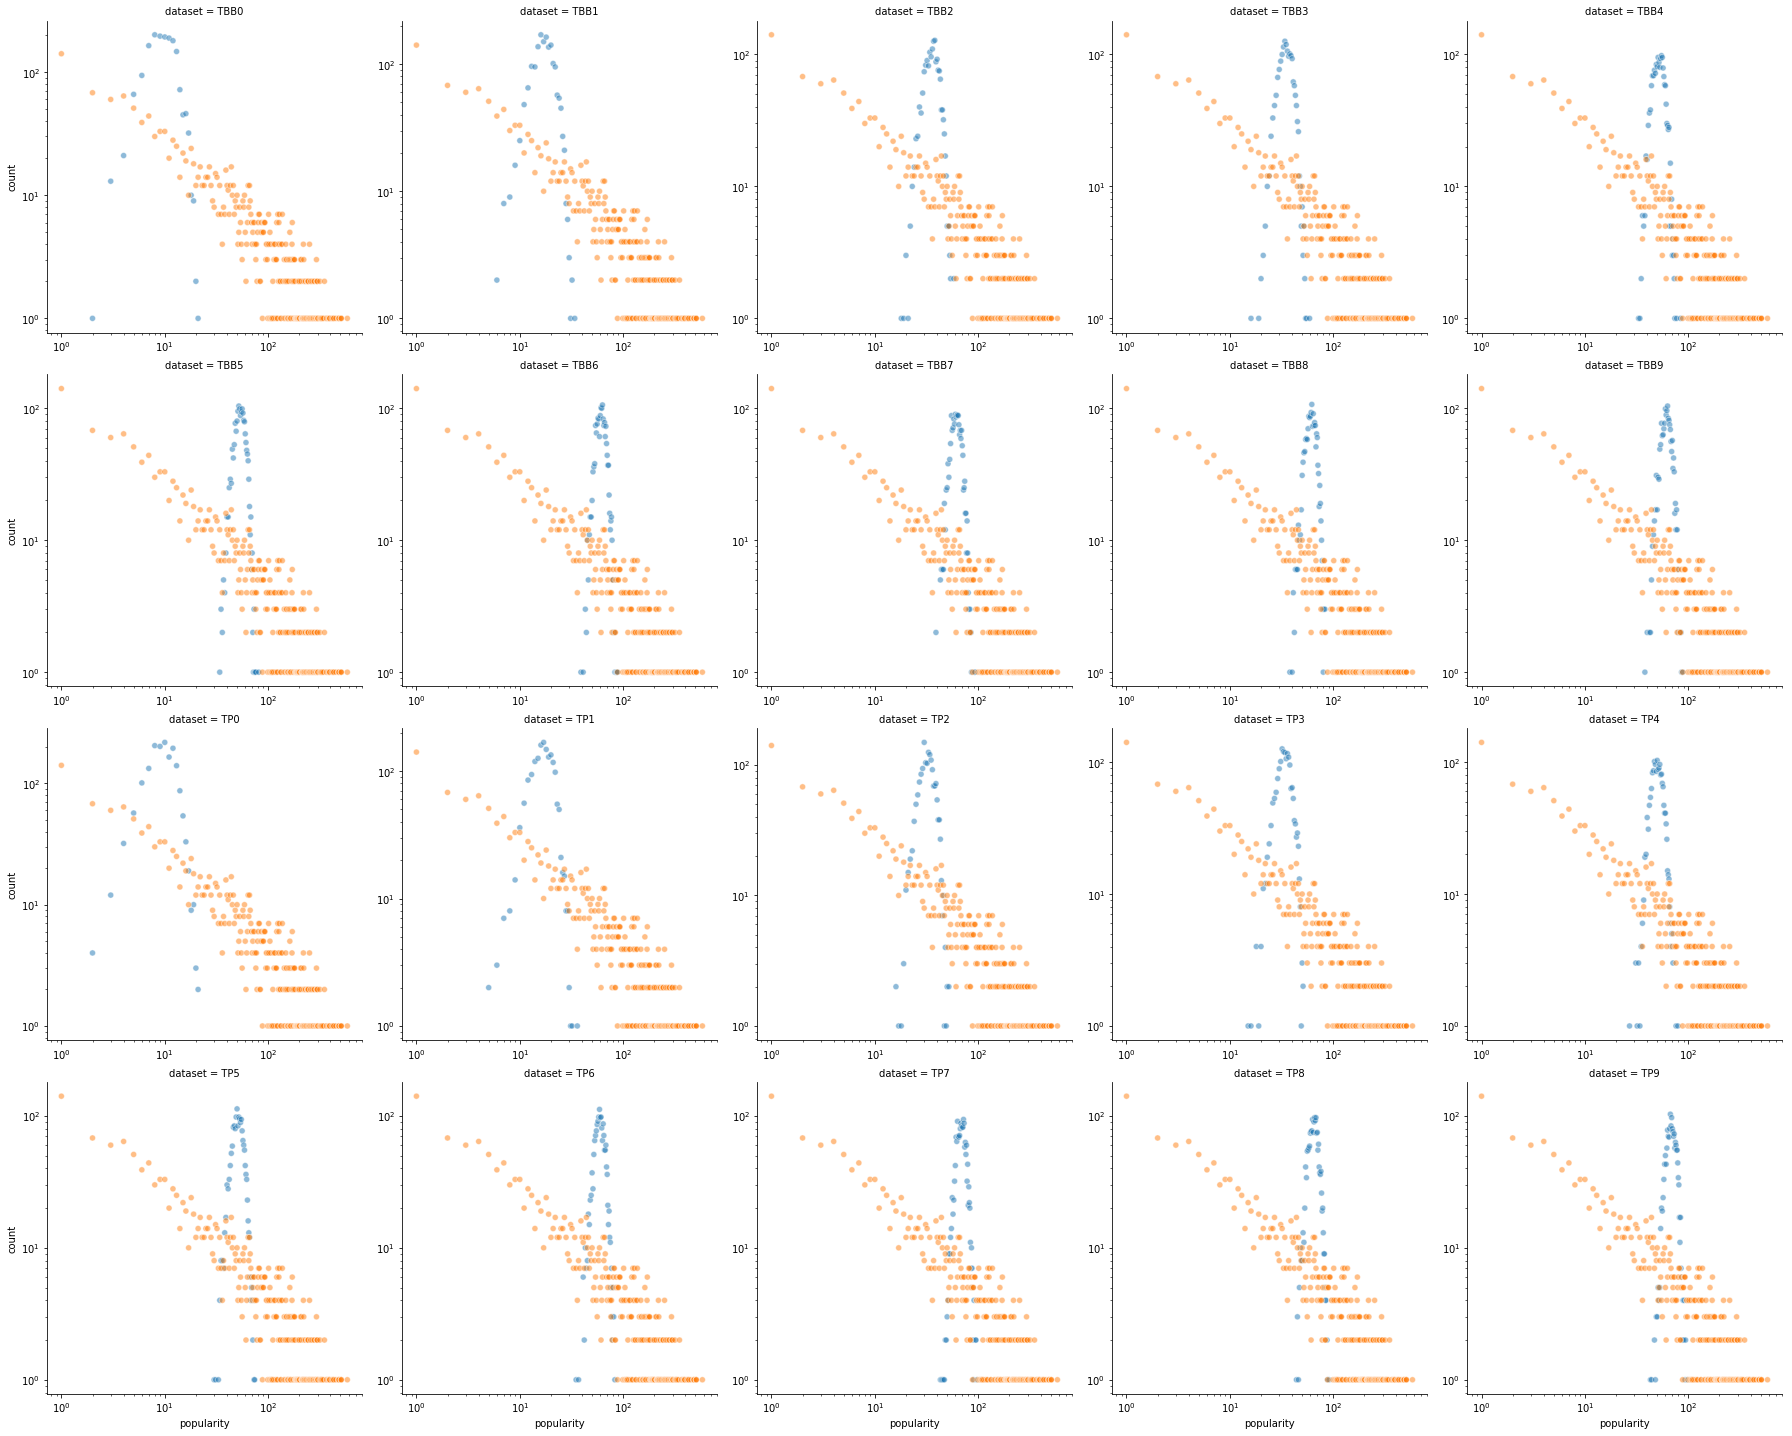

In [49]:
g = sns.FacetGrid(popularity_counts, col='dataset', hue='dataset', sharex=False, sharey=False, col_wrap=5, height=5)
g = (g.map(plot_scatter_against_baseline, 'popularity', 'count', hue='dataset', alpha=0.5, baseline=ml_100k_pop_counts)
     .set(xscale='log', yscale='log'))

#### Top10 parameters sorted by user activity KL

In [50]:
ml_100k_results, user_profile_df, item_popularity_df = summarize_datasets(ua_params)

dataset stats
    dataset  nusers  nitems  npairs   density
0   ml_100k     943    1682  100000  0.063047
1      TBB0     943    1682  103942  0.065532
2      TBB1     943    1682  103942  0.065532
3      TBB2     943    1682  103942  0.065532
4      TBB3     943    1682  103942  0.065532
5      TBB4     943    1682  106479  0.067131
6      TBB5     943    1682  103165  0.065042
7      TBB6     943    1682  103378  0.065176
8      TBB7     943    1682  103942  0.065532
9      TBB8     943    1682  103942  0.065532
10     TBB9     943    1682  103942  0.065532
11      TP0     943    1682  102441  0.064586
12      TP1     943    1682  107906  0.068031
13      TP2     943    1682  110106  0.069418
14      TP3     943    1682  116155  0.073232
15      TP4     943    1682  107516  0.067785
16      TP5     943    1682  113037  0.071266
17      TP6     943    1682  110155  0.069449
18      TP7     943    1682  117328  0.073971
19      TP8     943    1682  119284  0.075205
20      TP9     943 

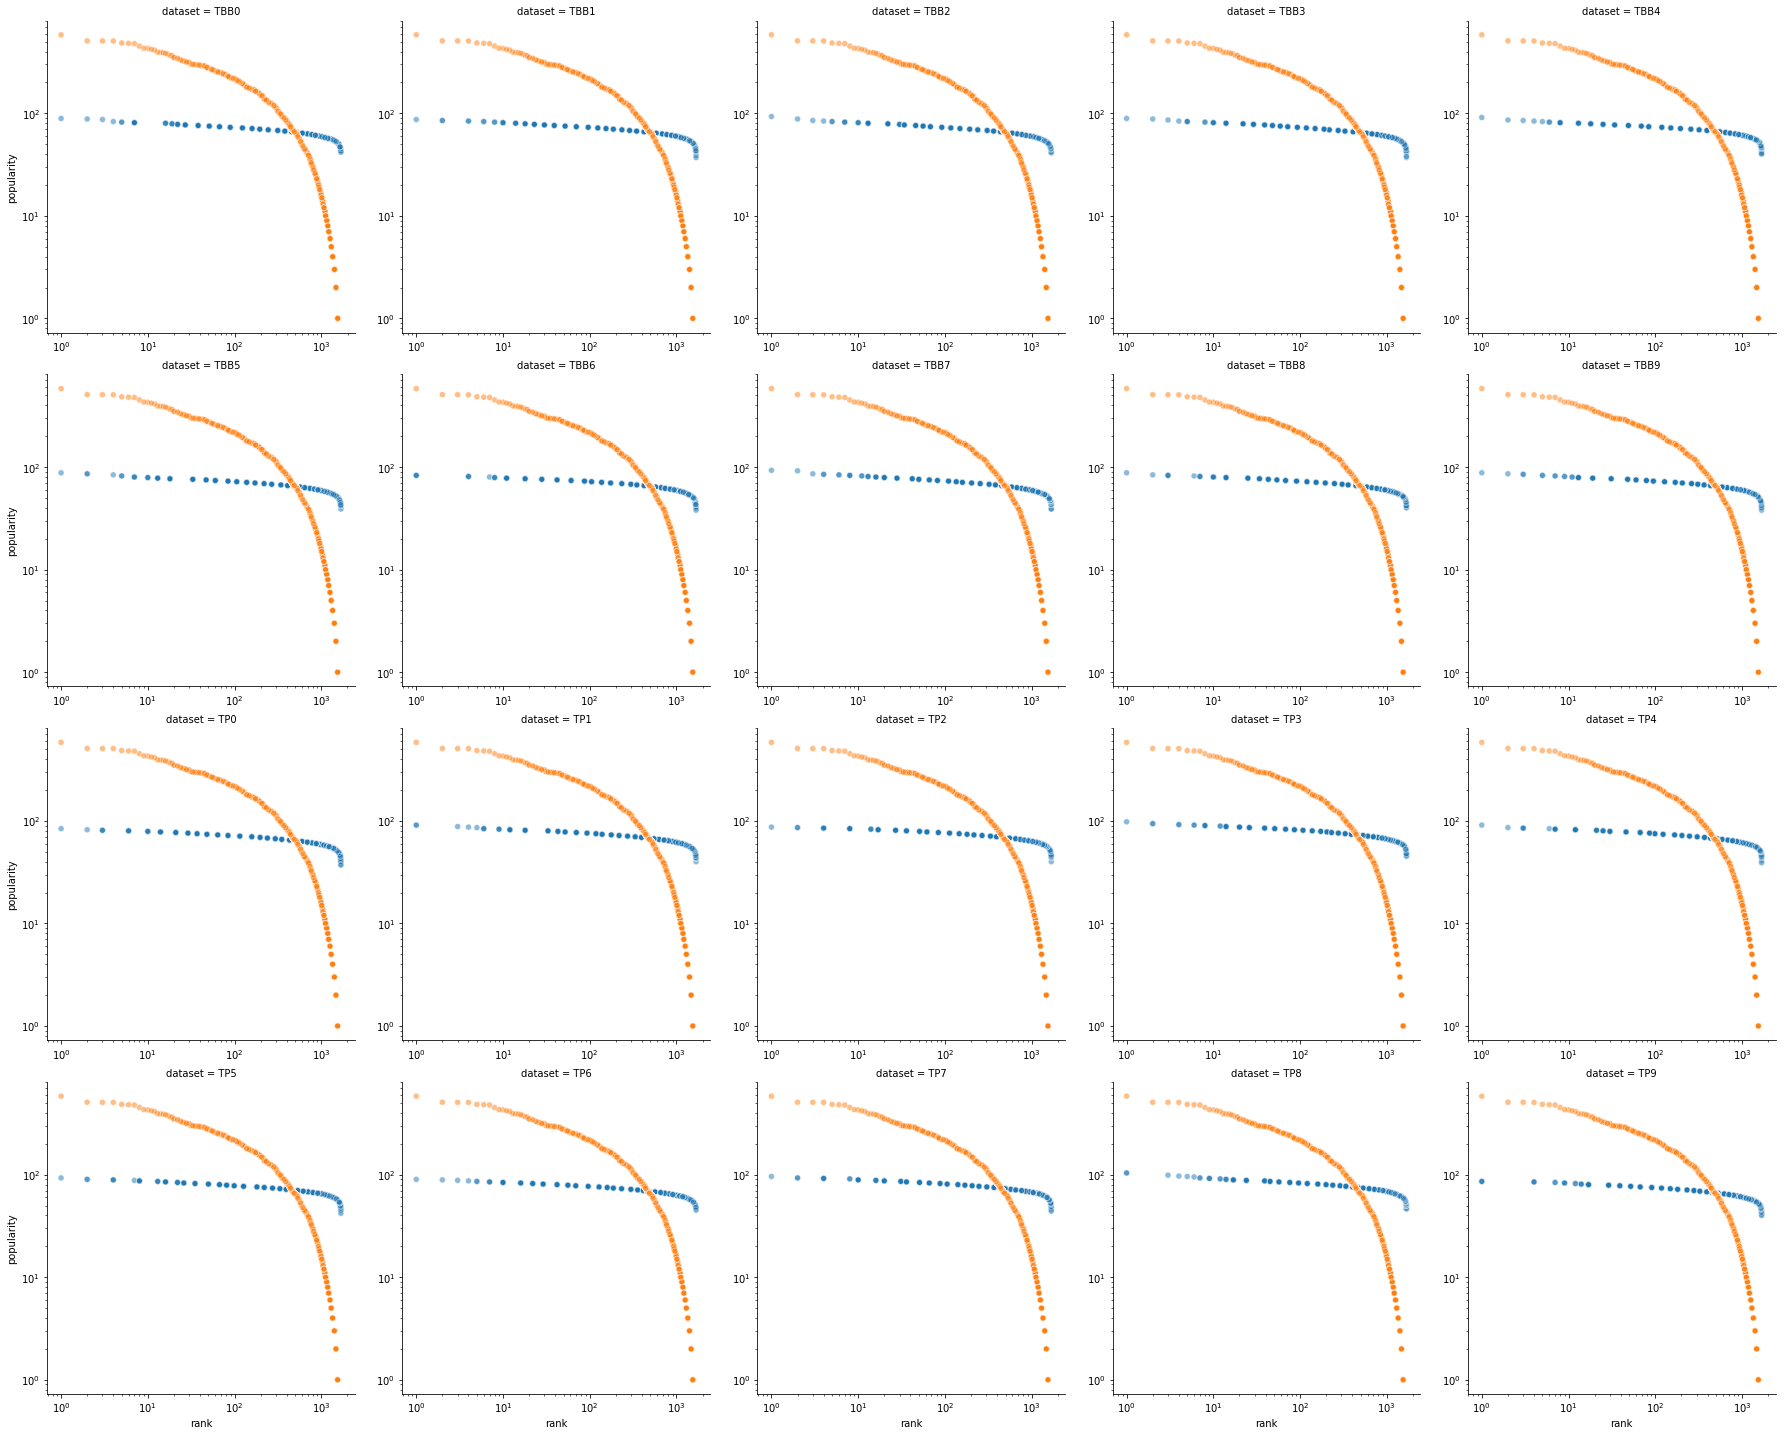

In [51]:
g = sns.FacetGrid(item_popularity_df, col='dataset', hue='dataset', sharex=False, sharey=False, col_wrap=5, height=5)
g = (g.map(plot_scatter_against_baseline, 'rank', 'count', hue='dataset', alpha=0.5, baseline=ml_100k_results[1])
     .set(xscale='log', yscale='log')
     .set_axis_labels('rank', 'popularity'))

In [52]:
popularity_counts = (item_popularity_df[['dataset', 'count']].groupby(['dataset', 'count'])
                     .size().reset_index().rename(columns={'count': 'popularity', 0: 'count'}))
ml_100k_pop_counts = (ml_100k_results[1][['dataset', 'count']].groupby(['dataset', 'count'])
                      .size().reset_index().rename(columns={'count': 'popularity', 0: 'count'}))

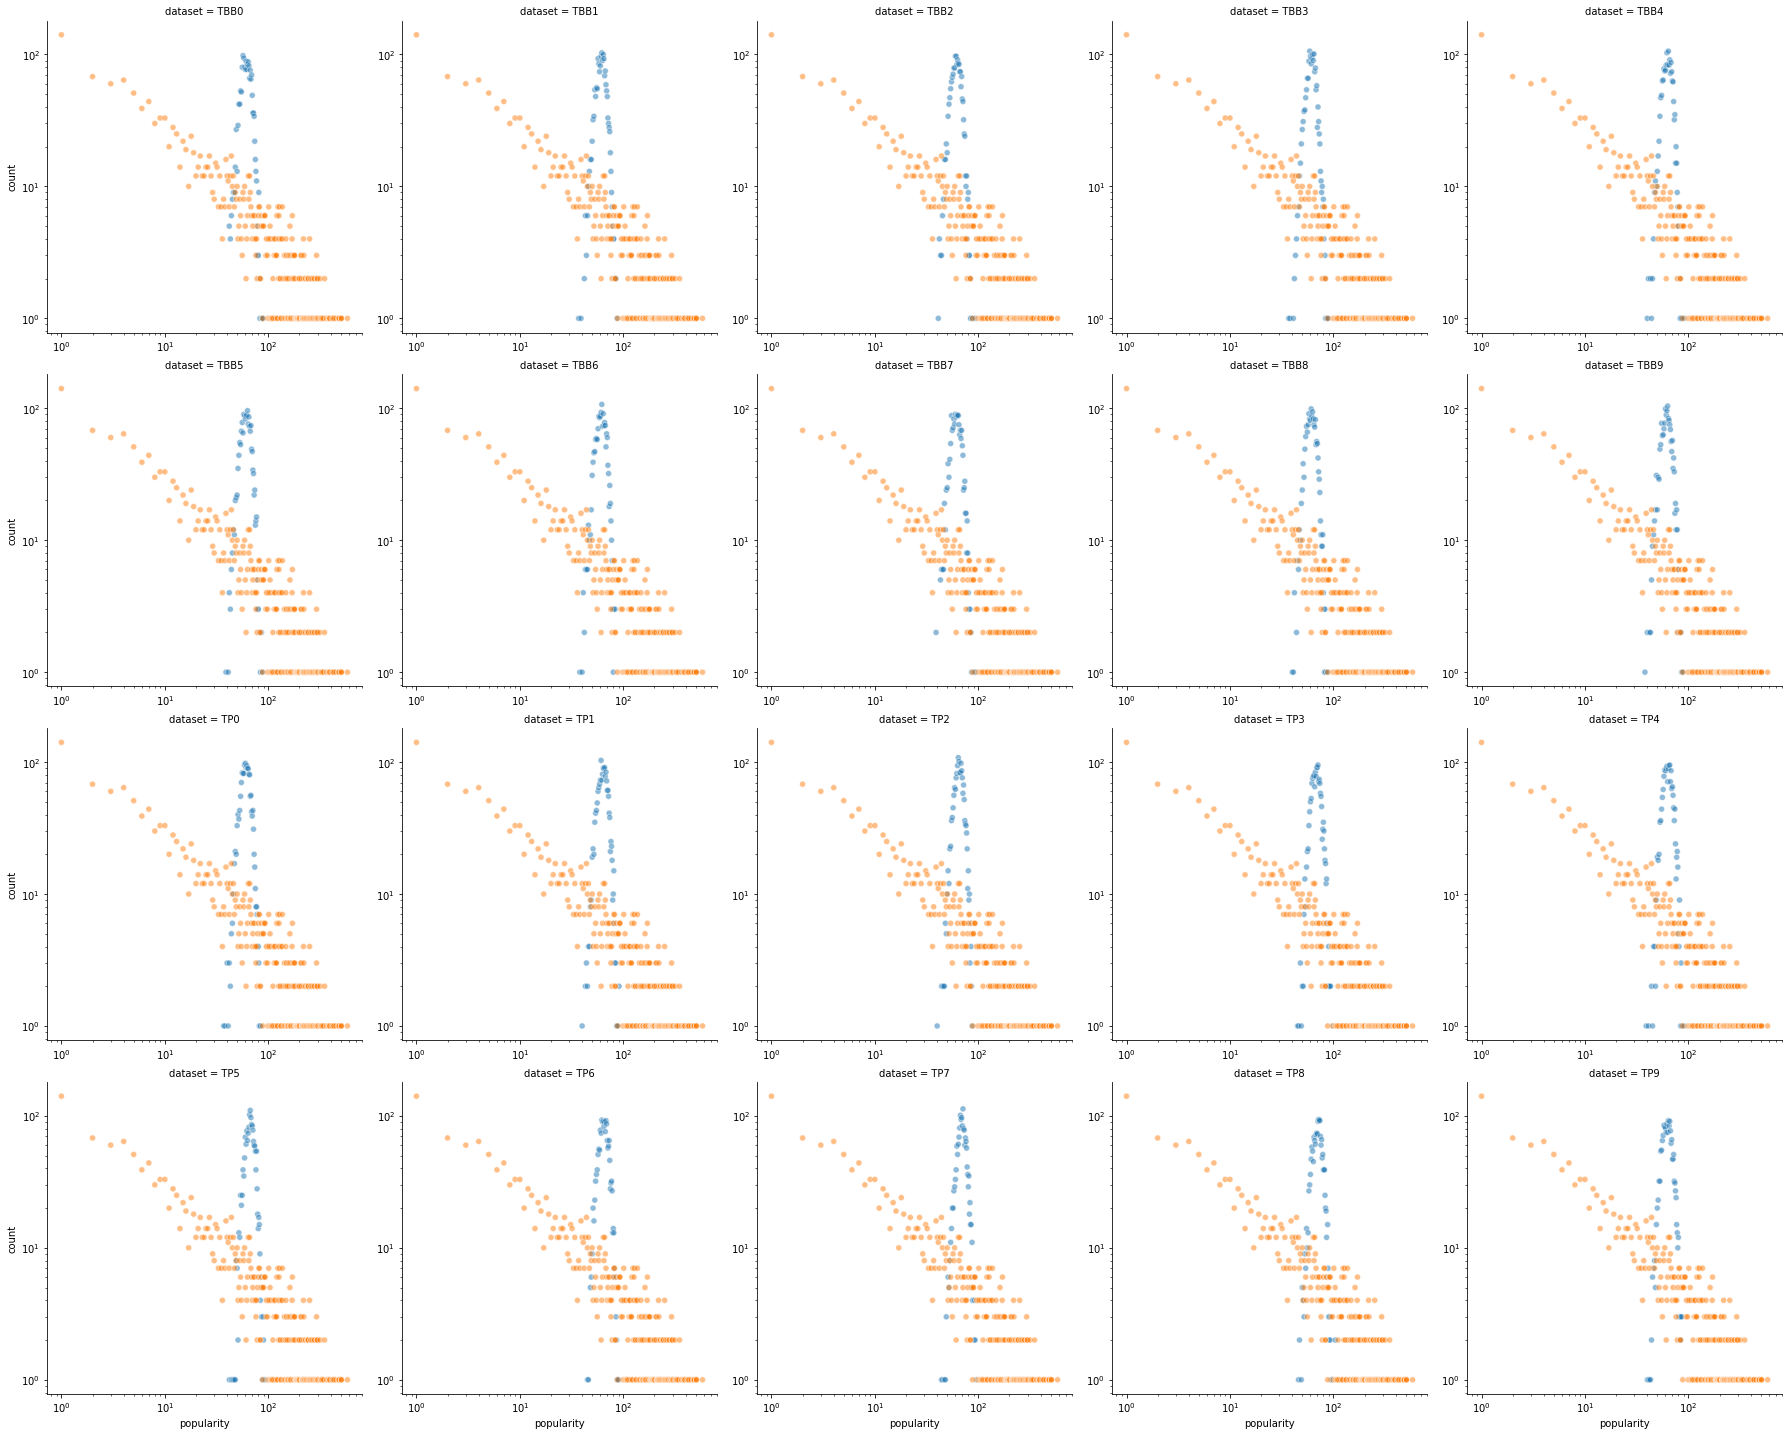

In [53]:
g = sns.FacetGrid(popularity_counts, col='dataset', hue='dataset', sharex=False, sharey=False, col_wrap=5, height=5)
g = (g.map(plot_scatter_against_baseline, 'popularity', 'count', hue='dataset', alpha=0.5, baseline=ml_100k_pop_counts)
     .set(xscale='log', yscale='log'))

#### Top10 parameters sorted by sum of squares of item popularity and user activity KL

In [54]:
ml_100k_results, user_profile_df, item_popularity_df = summarize_datasets(d_params)

dataset stats
    dataset  nusers  nitems  npairs   density
0   ml_100k     943    1682  100000  0.063047
1      TBB0     943    1682   16994  0.010714
2      TBB1     943    1682   29912  0.018859
3      TBB2     943    1682   61075  0.038506
4      TBB3     943    1682   59717  0.037650
5      TBB4     943    1682   88293  0.055666
6      TBB5     943    1682   90845  0.057275
7      TBB6     943    1682  103942  0.065532
8      TBB7     943    1682  103942  0.065532
9      TBB8     943    1682  103378  0.065176
10     TBB9     943    1682  103942  0.065532
11      TP0     943    1682   16630  0.010485
12      TP1     943    1682   29526  0.018615
13      TP2     943    1682   54354  0.034268
14      TP3     943    1682   56864  0.035851
15      TP4     943    1682   83057  0.052365
16      TP5     943    1682   89006  0.056115
17      TP6     943    1682  108386  0.068334
18      TP7     943    1682  122659  0.077332
19      TP8     943    1682  105699  0.066640
20      TP9     943 

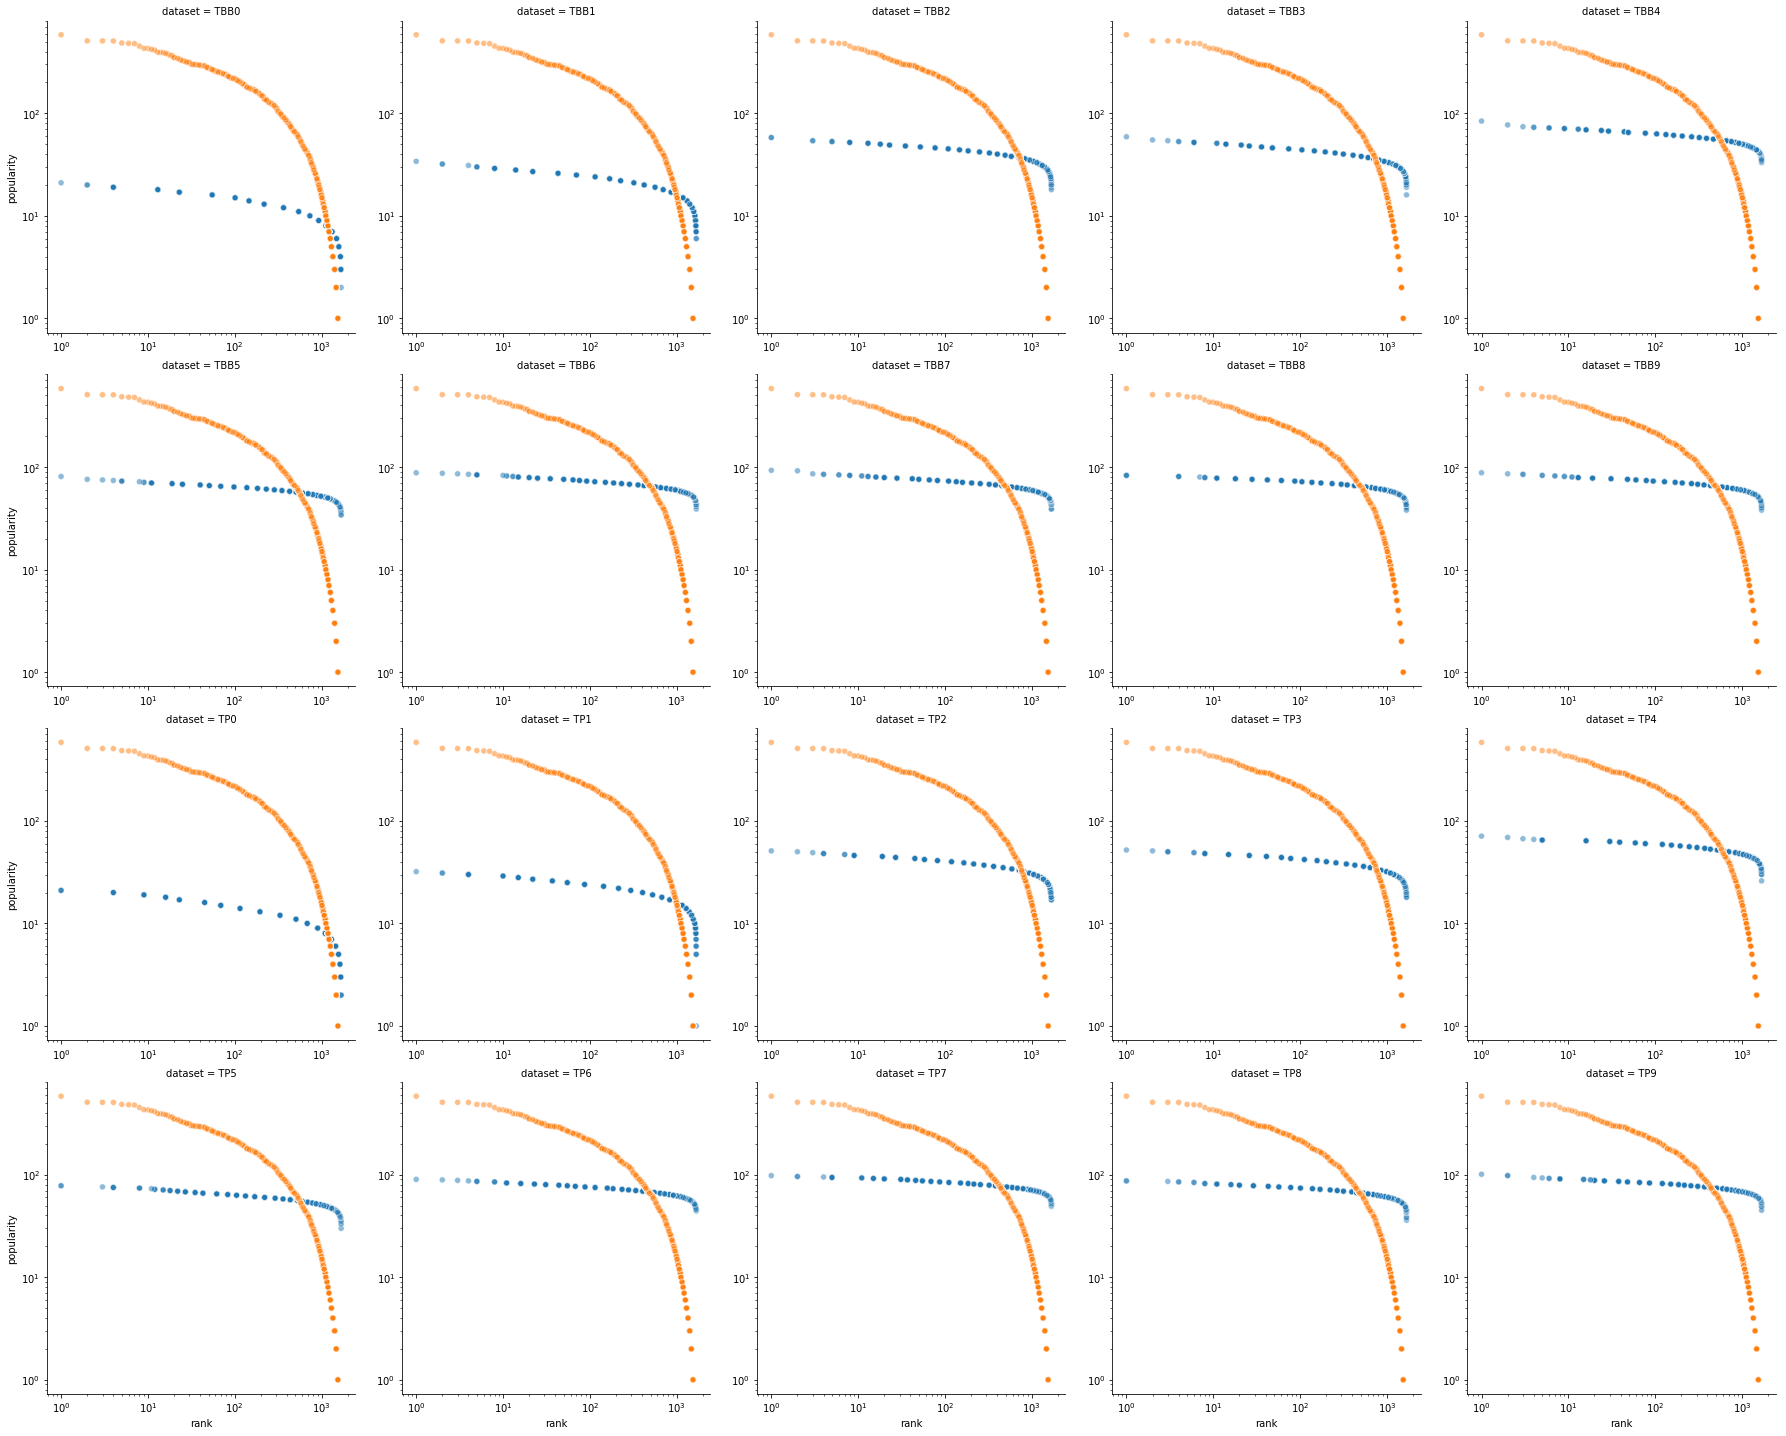

In [55]:
g = sns.FacetGrid(item_popularity_df, col='dataset', hue='dataset', sharex=False, sharey=False, col_wrap=5, height=5)
g = (g.map(plot_scatter_against_baseline, 'rank', 'count', hue='dataset', alpha=0.5, baseline=ml_100k_results[1])
     .set(xscale='log', yscale='log')
     .set_axis_labels('rank', 'popularity'))

In [56]:
popularity_counts = (item_popularity_df[['dataset', 'count']].groupby(['dataset', 'count'])
                     .size().reset_index().rename(columns={'count': 'popularity', 0: 'count'}))
ml_100k_pop_counts = (ml_100k_results[1][['dataset', 'count']].groupby(['dataset', 'count'])
                      .size().reset_index().rename(columns={'count': 'popularity', 0: 'count'}))

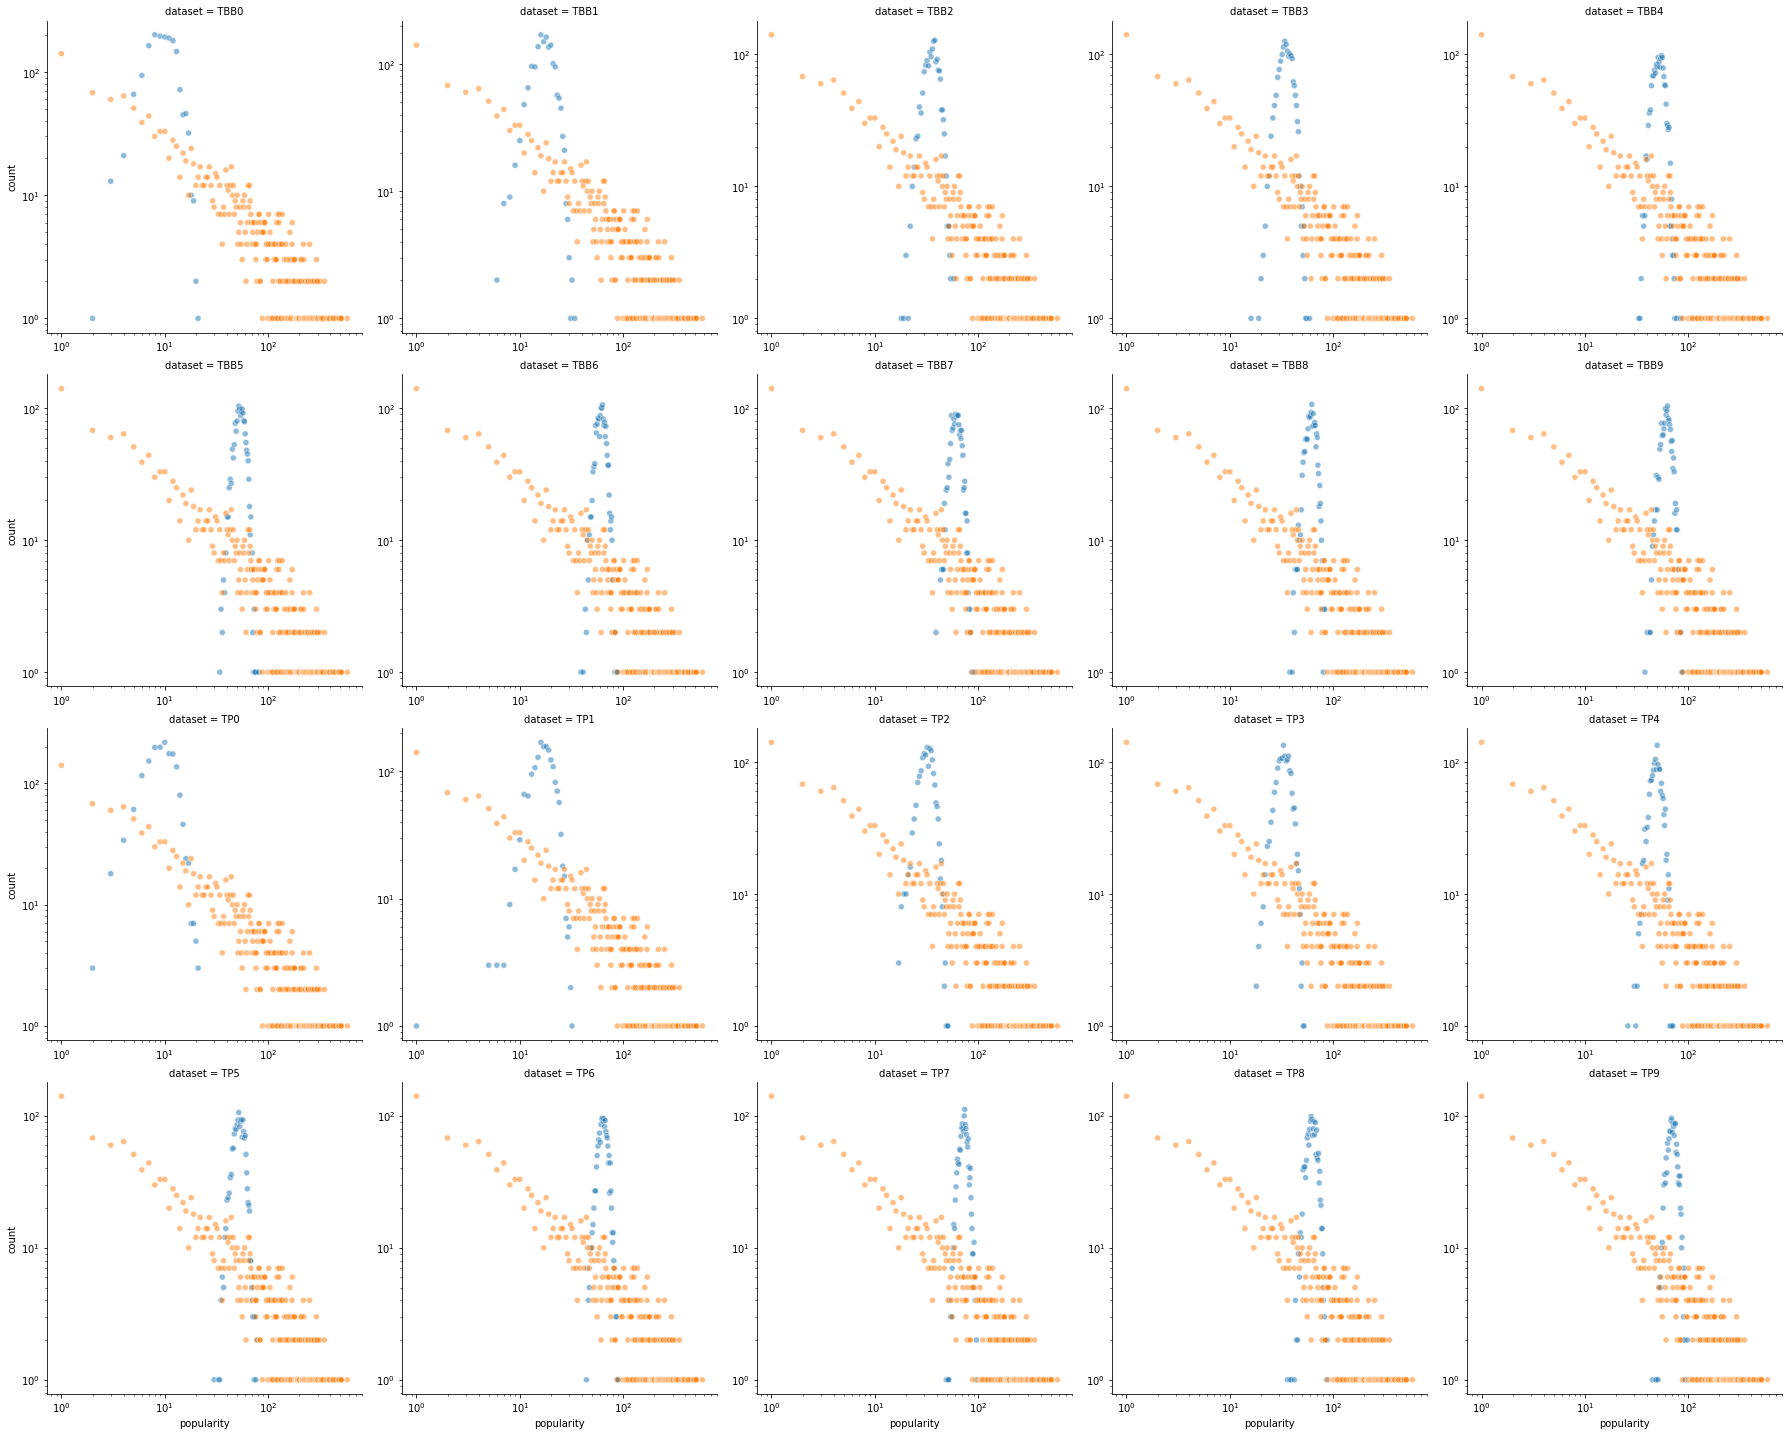

In [57]:
g = sns.FacetGrid(popularity_counts, col='dataset', hue='dataset', sharex=False, sharey=False, col_wrap=5, height=5)
g = (g.map(plot_scatter_against_baseline, 'popularity', 'count', hue='dataset', alpha=0.5, baseline=ml_100k_pop_counts)
     .set(xscale='log', yscale='log'))

In [58]:
user_profile_model1 = user_profile_df[user_profile_df['dataset'].isin(['ml_100k', 'simulated_beta_binomail'])].copy()
user_profile_model1['group'] = 1
user_profile_model2 = user_profile_df[user_profile_df['dataset'].isin(['ml_100k', 'simulated_pareto'])].copy()
user_profile_model2['group'] = 2
user_profile_models = pd.concat([user_profile_model1, user_profile_model2])

In [ ]:
g = sns.FacetGrid(user_profile_models.groupby(['group', 'dataset', 'item'], as_index=False).count().sort_values(['group', 'dataset', 'item']), col='group', hue='dataset', height=6)
g = (g.map(sns.scatterplot, 'item', 'user', alpha=0.7)
     .add_legend()
     .set_axis_labels('user profile size', 'number of users'))

In [ ]:
g = sns.FacetGrid(user_profile_models, col='group', hue='dataset', height=6)
g = (g.map(sns.distplot, 'item', kde=False)
     .add_legend()
     .set_axis_labels('user profile size', 'number of users'))
plt.show()

In [58]:
item_popularity_df.head()

,item,user,dataset,rank
0,1,452,ml_100k,8.0
1,2,131,ml_100k,239.0
2,3,90,ml_100k,372.0
3,4,209,ml_100k,107.0
4,5,86,ml_100k,388.0


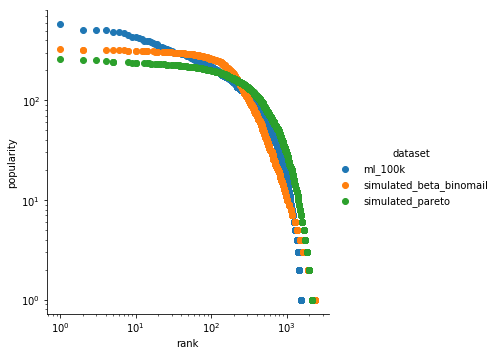

In [59]:
g = sns.FacetGrid(item_popularity_df, hue='dataset', height=5)
g = (g.map(plt.scatter, 'rank', 'user')
     .set(xscale='log', yscale='log')
     .set_axis_labels('rank', 'popularity')
     .add_legend())

In [60]:
count_popularity.head()

,dataset,user,count
0,ml_100k,1,141
1,ml_100k,2,68
2,ml_100k,3,60
3,ml_100k,4,64
4,ml_100k,5,51


In [50]:
count_popularity_model1 = count_popularity[count_popularity['dataset'].isin(['ml_100k', 'simulated_beta_binomail'])].copy()
count_popularity_model1['group'] = 1
count_popularity_model2 = count_popularity[count_popularity['dataset'].isin(['ml_100k', 'simulated_pareto'])].copy()
count_popularity_model2['group'] = 2
count_popularity_models = pd.concat([count_popularity_model1, count_popularity_model2])

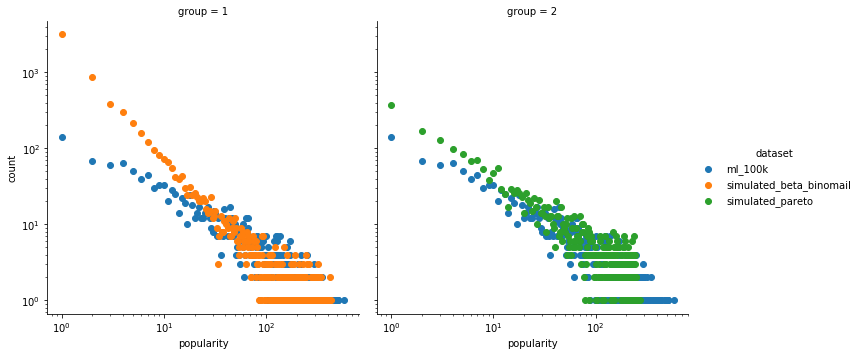

In [51]:
g = sns.FacetGrid(count_popularity_models, col='group', hue='dataset', height=5)
g = (g.map(plt.scatter, 'user', 'count')
     .set(xscale='log', yscale='log')
     .set_axis_labels('popularity', 'count').add_legend())

In [246]:
from scipy.stats import entropy

In [247]:
tall_popularity_count = count_popularity_model1.pivot_table(index='user', columns='dataset', values='count')

In [248]:
p = np.ones(max(tall_popularity_count['ml_100k'].dropna().index))

In [249]:
p[tall_popularity_count['ml_100k'].dropna().index.values - 1] += tall_popularity_count['ml_100k'].dropna().values

In [250]:
p /= p.sum()

In [251]:
q = np.ones(max(tall_popularity_count['simulated_beta_binomail'].dropna().index))

In [252]:
q[tall_popularity_count['simulated_beta_binomail'].dropna().index.values - 1] += tall_popularity_count['simulated_beta_binomail'].dropna().values

In [253]:
q /= q.sum()

In [254]:
lb = min(len(q), len(p))

In [255]:
entropy(q[:lb], p[:lb])

0.09075708186382384

In [256]:
tall_popularity_count = count_popularity_model1.pivot_table(index='user', columns='dataset', values='count', fill_value=0)

In [257]:
p = tall_popularity_count['ml_100k'] + 1

In [258]:
p /= p.sum()

In [259]:
q = tall_popularity_count['simulated_beta_binomail'] + 1

In [260]:
q /= q.sum()

In [261]:
entropy(q, p)

0.23545846119972072